### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
null_values= data.isnull().sum()
print(null_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

Since only a small fraction of entries have values and Car field doesn't have any material impact to the end goal, drop this column

In [5]:
#Since only a small fraction of entries have values and Car field doesn't have any material impact to the end goal, drop this column
data.drop(columns=["car"], inplace=True)

#Since only a small fraction of values are missing in'Bar' column, replace the missing values with the most frequent value in the dataset.'
data["Bar"].fillna(data["Bar"].mode()[0], inplace=True)

#Since only a small fraction of values are missing in'CoffeeHouse' column, replace the missing values with the most frequent value in the dataset.'
data["CoffeeHouse"].fillna(data["CoffeeHouse"].mode()[0], inplace=True)

#Since only a small fraction of values are missing in'CarryAway' column, replace the missing values with the most frequent value in the dataset.'
data["CarryAway"].fillna(data["CarryAway"].mode()[0], inplace=True)

#Since only a small fraction of values are missing in'RestaurantLessThan20' column, replace the missing values with the most frequent value in the dataset.'
data["RestaurantLessThan20"].fillna(data["RestaurantLessThan20"].mode()[0], inplace=True)

#Since only a small fraction of values are missing in'Restaurant20To50' column, replace the missing values with the most frequent value in the dataset.'
data["Restaurant20To50"].fillna(data["Restaurant20To50"].mode()[0], inplace=True)

data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [6]:
#removing duplicates
data.drop_duplicates(keep=False, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12536 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12536 non-null  object
 1   passanger             12536 non-null  object
 2   weather               12536 non-null  object
 3   temperature           12536 non-null  int64 
 4   time                  12536 non-null  object
 5   coupon                12536 non-null  object
 6   expiration            12536 non-null  object
 7   gender                12536 non-null  object
 8   age                   12536 non-null  object
 9   maritalStatus         12536 non-null  object
 10  has_children          12536 non-null  int64 
 11  education             12536 non-null  object
 12  occupation            12536 non-null  object
 13  income                12536 non-null  object
 14  Bar                   12536 non-null  object
 15  CoffeeHouse           12536 non-null  obj

4. What proportion of the total observations chose to accept the coupon?



In [7]:
coupon_acceptance_rate = data["Y"].mean()
print (f"The Proportion of total observations that chose to accept the coupon are {round(coupon_acceptance_rate*100, 2)}%")

The Proportion of total observations that chose to accept the coupon are 56.67%


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Distribution')

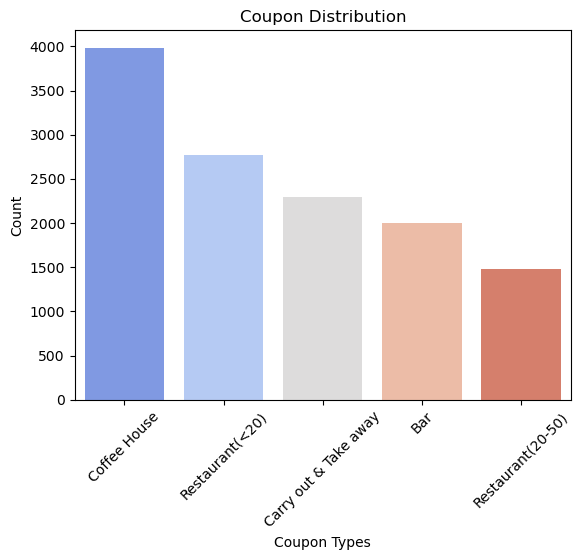

In [8]:
sns.countplot( x=data["coupon"], palette="coolwarm", order= data["coupon"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Coupon Types")
plt.ylabel("Count")
plt.title("Coupon Distribution")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Distribution')

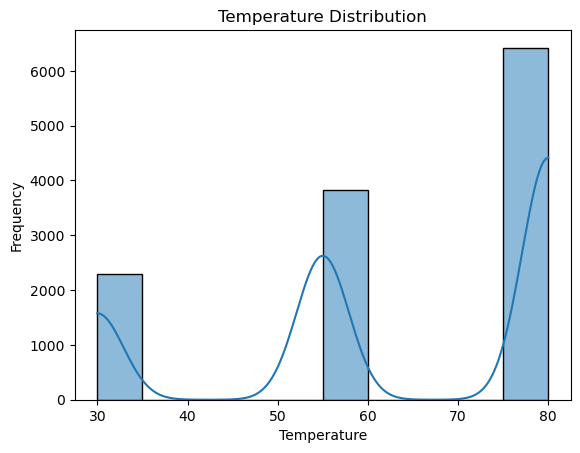

In [9]:
sns.histplot(data['temperature'], bins=10, kde=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")

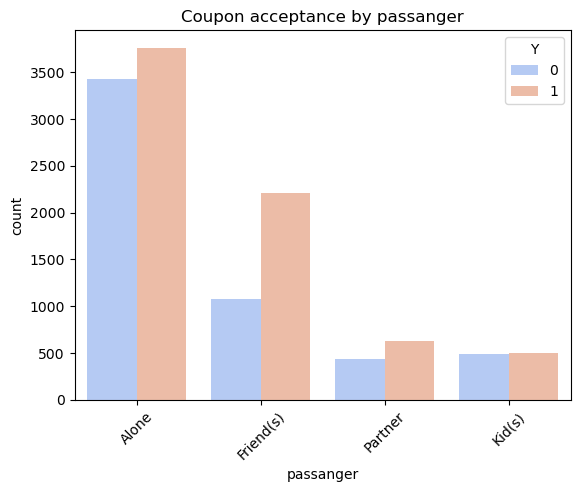

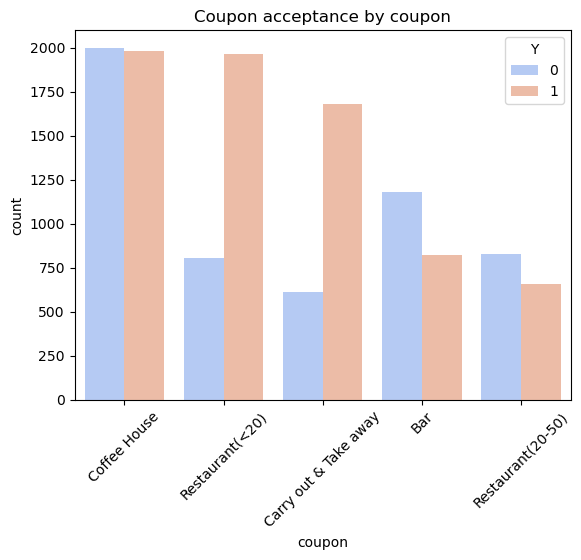

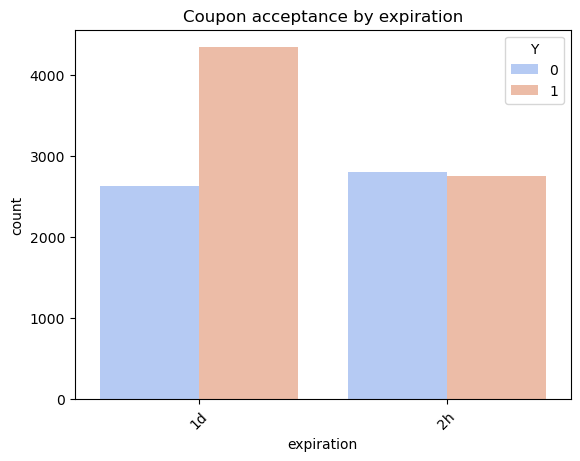

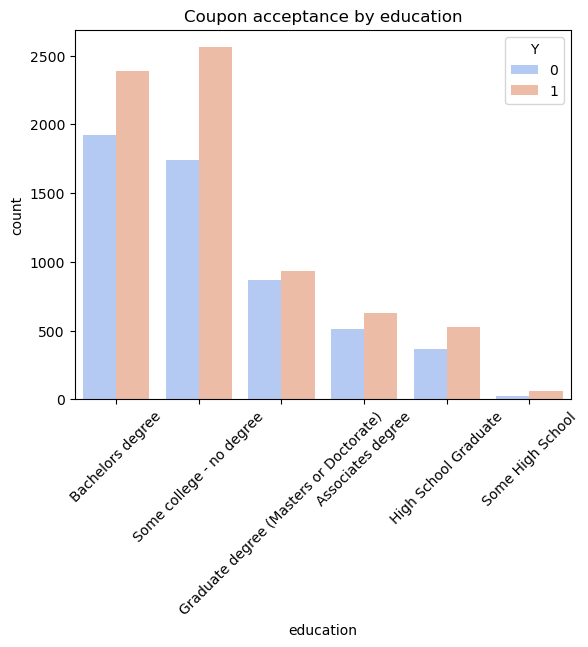

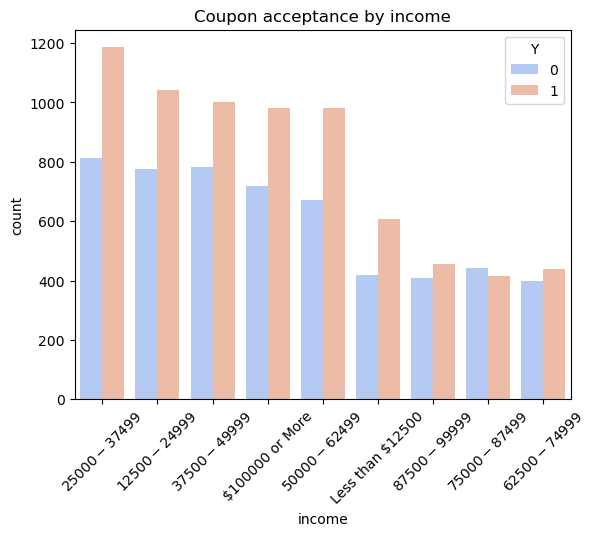

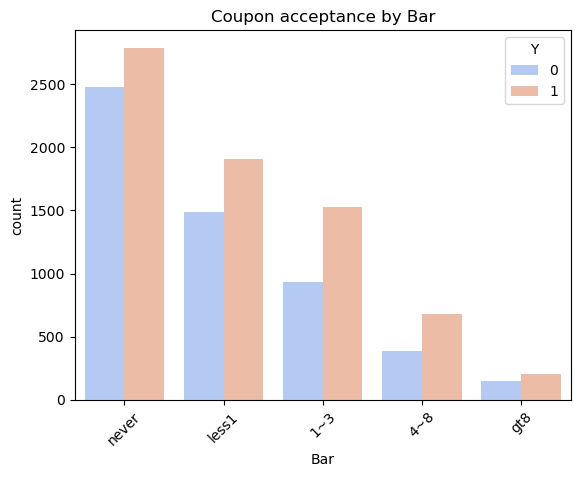

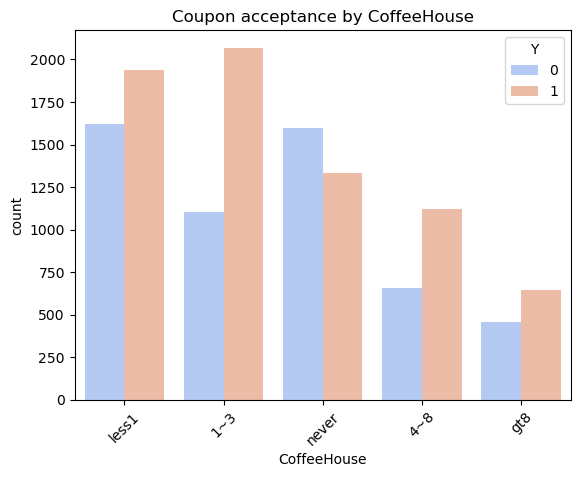

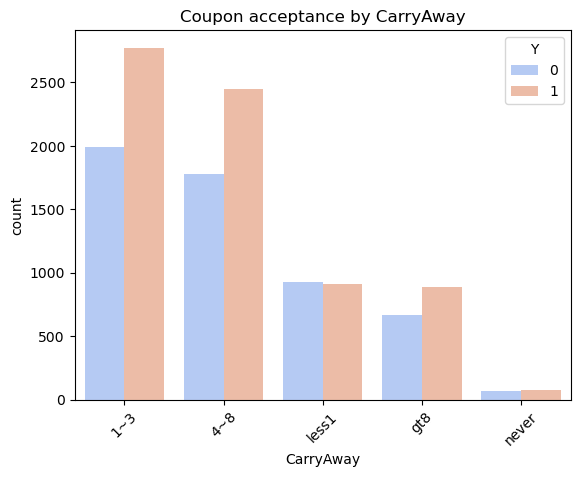

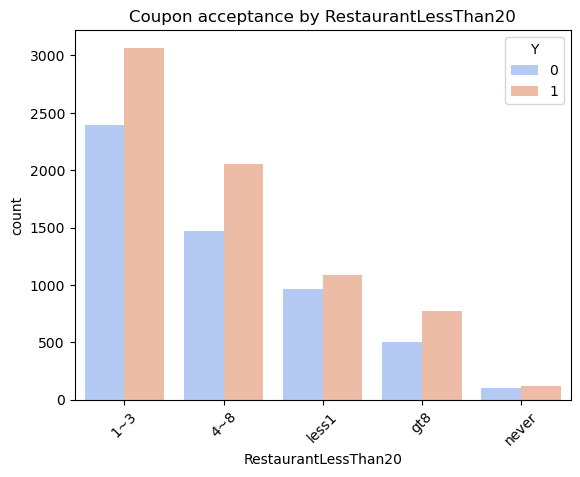

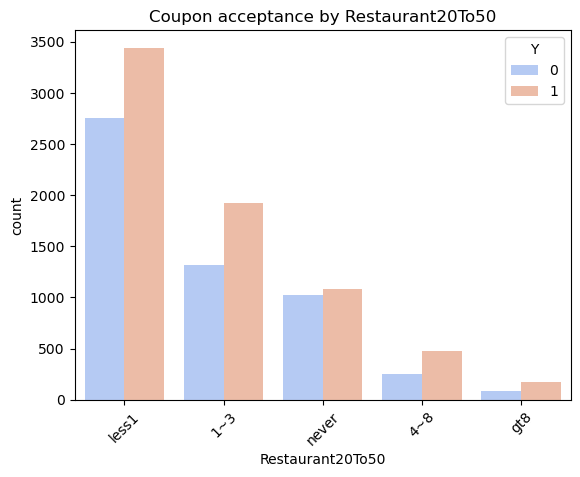

In [10]:
#Analyzing Categorical variables
cat_vars = ["passanger", "coupon", "expiration", "education", "income", 
            "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]
for var in cat_vars:
    sns.countplot(data=data, x=var, hue="Y", palette="coolwarm", order=data[var].value_counts().index)
    plt.title(f"Coupon acceptance by {var}")
    plt.xticks(rotation=45)
    plt.show()

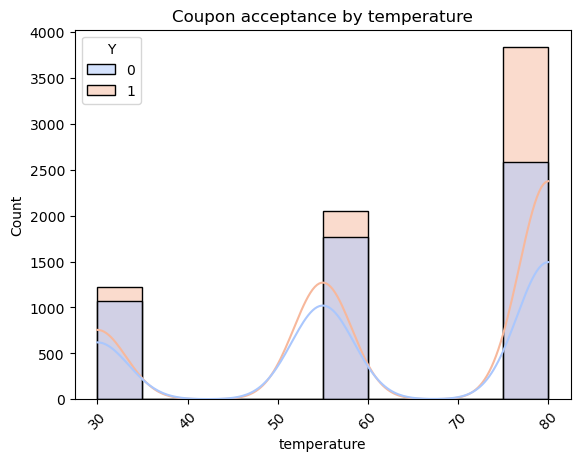

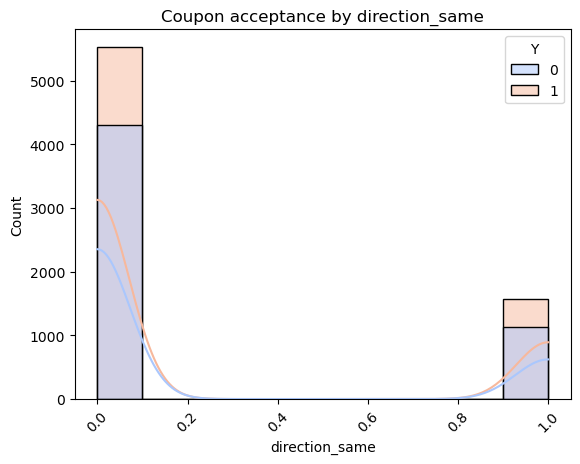

In [11]:
#Analyzing numerical variables
num_vars = ["temperature", "direction_same"]
for var in num_vars:
    sns.histplot(data=data, x=var, hue="Y", bins=10, kde=True, palette="coolwarm")
    plt.title(f"Coupon acceptance by {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_coupon_df=data[data["coupon"]=="Bar"]
print(bar_coupon_df)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [16]:
bar_coupon_acceptance_rate=bar_coupon_df["Y"].mean()
print(f'Bar coupon acceptance rate is {round(bar_coupon_acceptance_rate*100, 2)}%')

Bar coupon acceptance rate is 40.99%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
low_visitor_bar = bar_coupon_df[bar_coupon_df["Bar"].isin(["never", "less1", "1~3"])]
high_visitor_bar =  bar_coupon_df[bar_coupon_df["Bar"].isin(["4~8", "gt8"])] 
print(f'Coupon acceptance rate amongst infrequent bar visitors is {round(low_visitor_bar["Y"].mean()*100, 2)}')
print(f'Coupon acceptance rate amongst frequent bar visitors is {round(high_visitor_bar["Y"].mean()*100, 2)}')


Coupon acceptance rate amongst infrequent bar visitors is 37.03
Coupon acceptance rate amongst frequent bar visitors is 76.88


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [36]:
prb4_target_group_df = bar_coupon_df[(~bar_coupon_df["age"].isin(["21","below21"])) & 
                                     (bar_coupon_df["Bar"].isin(["1~3","4~8","gt8"]))]
prb4_other_group_df = bar_coupon_df[~bar_coupon_df.index.isin(prb4_target_group_df.index)]

print(f'Bar coupon acceptance rate between driver who go to bar more than once a month and are over age 25 is {round(prb4_target_group_df["Y"].mean()*100,2)}%')
print(f'Bar coupon acceptance rate between driver who go to bar less than once a month or are under age 25 is {round(prb4_other_group_df["Y"].mean()*100,2)}%')

Bar coupon acceptance rate between driver who go to bar more than once a month and are over age 25 is 69.52%
Bar coupon acceptance rate between driver who go to bar less than once a month or are under age 25 is 33.42%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [31]:
prb5_target_group_df = bar_coupon_df[
                                (bar_coupon_df["Bar"].isin(["1~3","4~8","gt8"])) &
                                (bar_coupon_df["passanger"] != "Kid(s)") &
                                (~bar_coupon_df["occupation"].isin(["Farming","Fishing","Forestry"]))
                            ]
prb5_other_group_df = bar_coupon_df[~bar_coupon_df.index.isin(prb5_target_group_df.index)]

print(f'Bar coupon acceptance rate between driver who go to bar more than once a month, without kids and not working in farming, fishing or forestry is {round(prb5_target_group_df["Y"].mean()*100,2)}%')
print(f'Bar coupon acceptance rate between driver who go to bar less than once a month or with kids or working in fishing, farming or forestry is {round(prb5_other_group_df["Y"].mean()*100,2)}%')

Bar coupon acceptance rate between driver who go to bar more than once a month, without kids and not working in farming, fishing or forestry is 71.32%
Bar coupon acceptance rate between driver who go to bar less than once a month or with kids or working in fishing, farming or forestry is 29.48%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [34]:
prb6_group1_df = bar_coupon_df[
    (bar_coupon_df["Bar"].isin(["1~3", "4~8", "gt8"])) &
     (bar_coupon_df["passanger"] != "Kid(s)") &
     (bar_coupon_df["maritalStatus"] != "Widowed")
                        ]
prb6_group2_df = bar_coupon_df[
    (bar_coupon_df["Bar"].isin(["1~3", "4~8", "gt8"])) &
     (bar_coupon_df["age"].isin(["21","26","below21"]))
                        ]
prb6_group3_df = bar_coupon_df[
    (bar_coupon_df["RestaurantLessThan20"].isin(["4~8", "gt8"])) &
     (bar_coupon_df["income"].isin(["$25000 - $37499","$12500 - $24999","$37500 - $49999", "Less than $12500"]))
                        ]
prb6_other_group_df = bar_coupon_df[
                        ~bar_coupon_df.index.isin(prb6_group1_df.index) & 
                        ~bar_coupon_df.index.isin(prb6_group2_df.index) &
                        ~bar_coupon_df.index.isin(prb6_group3_df.index) 
                                ]
print(f'Bar coupon acceptance rate for Group1 is {round(prb6_group1_df["Y"].mean()*100,2)}%')
print(f'Bar coupon acceptance rate for Group2 is {round(prb6_group2_df["Y"].mean()*100,2)}%')
print(f'Bar coupon acceptance rate for Group3 is {round(prb6_group3_df["Y"].mean()*100,2)}%')
print(f'Bar coupon acceptance rate for the other group is {round(prb6_other_group_df["Y"].mean()*100,2)}%')



Bar coupon acceptance rate for Group1 is 71.32%
Bar coupon acceptance rate for Group2 is 72.17%
Bar coupon acceptance rate for Group3 is 45.35%
Bar coupon acceptance rate for the other group is 29.67%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Hypothesis about Drivers who accepted bar coupons

**1. Frequent bar-goer are more likely to accept bar coupons**
 - Drivers who visit bars more than once a month accept bar coupons at a **higher rate** than those who rarely go.
 
**2. Younger drivers may be more likely to accept the coupon**
 - Drivers **under 30 years** age, who visits bars, have a higher rate of coupon acceptance.

 **3. Passengers have influence over coupon acceptance**
 - Drivers who didn't have kids with them were more likely to accept the coupons.
 - Drivers would other passengers, like friends, colleagues etc. were more likely to accept bar coupons for possible socializing activities.
  
 **4. Marital status might influence coupon acceptance**

 - Widowed drivers were less likely to accept bar coupons, compared to other marital statuses.
 
 **In Summary:**
 Drivers who frequent bars, are younger, socially engaged (not widowers) and budget conscious are more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [44]:
#Get all the records with CoffeeHouse coupons
coffeehouse_coupons_df=data[data["coupon"] == "Coffee House"]


In [42]:
#Calculate the acceptance rate for coffeehouse coupons
print(f'The acceptance rate for CoffeeHouse coupons is {round(coffeehouse_coupons_df["Y"].mean()*100,2)}%')

The acceptance rate for CoffeeHouse coupons is 49.8%


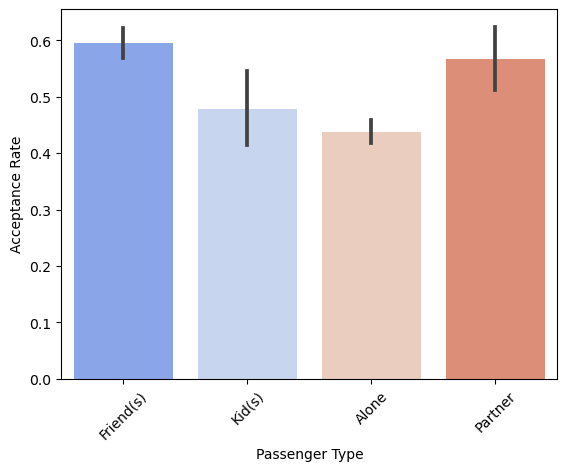

In [43]:
#Compare acceptance rate by passengerType
sns.barplot(x=coffeehouse_coupons_df["passanger"], y=coffeehouse_coupons_df["Y"], palette="coolwarm")
plt.xlabel("Passenger Type")
plt.ylabel("Acceptance Rate")
plt.title("CoffeeHouse coupon acceptance rate by Passenger type")
plt.xticks(rotation=45)
plt.show()

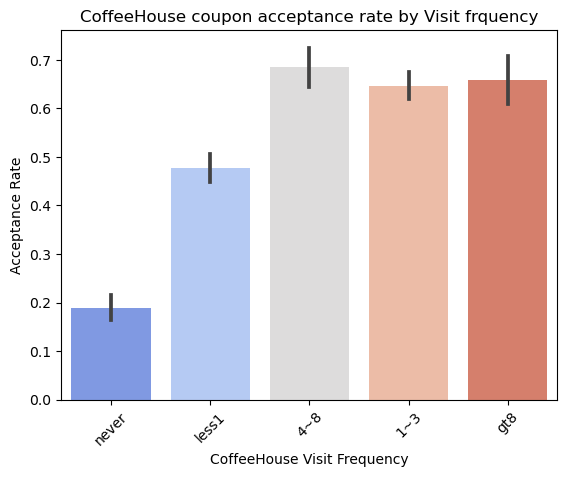

In [48]:
#Compare CoffeeHouse coupon acceptance rate by number of visit frequency
sns.barplot(x=coffeehouse_coupons_df["CoffeeHouse"], y=coffeehouse_coupons_df["Y"], palette="coolwarm")
plt.xlabel("CoffeeHouse Visit Frequency")
plt.ylabel("Acceptance Rate")
plt.title("CoffeeHouse coupon acceptance rate by Visit frquency")
plt.xticks(rotation=45)
plt.show()

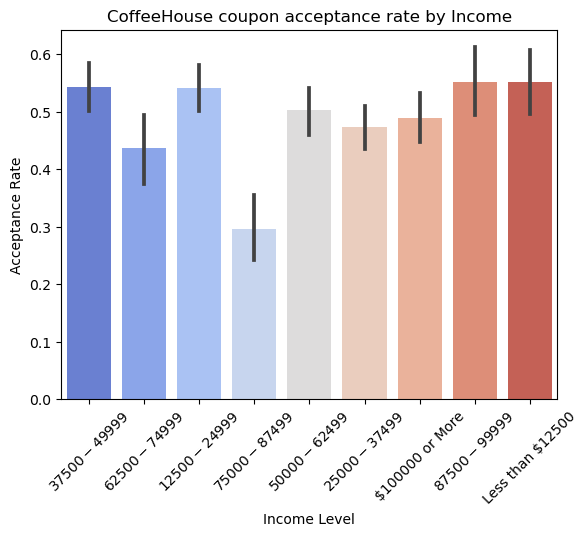

In [49]:
#Compare CoffeeHouse coupon acceptance rate by income level
sns.barplot(x=coffeehouse_coupons_df["income"], y=coffeehouse_coupons_df["Y"], palette="coolwarm")
plt.xlabel("Income Level")
plt.ylabel("Acceptance Rate")
plt.title("CoffeeHouse coupon acceptance rate by Income")
plt.xticks(rotation=45)
plt.show()

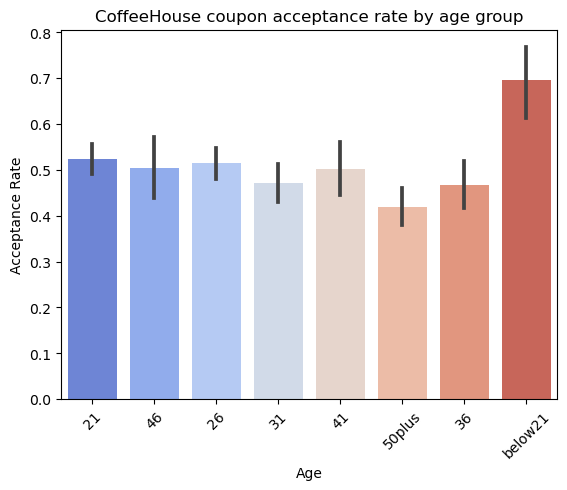

In [50]:
#Compare CoffeeHouse coupon acceptance rate by age
sns.barplot(x=coffeehouse_coupons_df["age"], y=coffeehouse_coupons_df["Y"], palette="coolwarm")
plt.xlabel("Age")
plt.ylabel("Acceptance Rate")
plt.title("CoffeeHouse coupon acceptance rate by age group")
plt.xticks(rotation=45)
plt.show()

## Hypothesis about Drivers who accepted CoffeeHouse coupons

**1. Frequent CoffeeHouse visitors are more likely to accept the coupons**
 - Drivers who visit Coffee House more than once a month accept the coupons at a **higher rate** than those who rarely go.
 
**2. Younger drivers may be more likely to accept the coupon**
 - Drivers **21 years** age, have the highest acceptance rate
 - Highest average acceptance rate is amongst visitors **below 50 years** of age. 
 
 **3. Passengers have influence over coupon acceptance rate**
 - Highest rate of acceptance is found when drivers are with friends and partners, possibly indicating social activity.
  
  **In Summary:**
 Drivers who frequent bars, are younger and socially engaged are more likely to accept Coffee House coupons.